In [1]:
include("isolation-forest.jl")

all_branches! (generic function with 3 methods)

In [2]:
using Printf,   StatsBase , Random, Distributions, LinearAlgebra, Plots,BenchmarkTools,Plots

# Utility Function

In [41]:
function getDepth(x, root, d)
    n = root.n
    p = root.p
    if root.ntype == "exNode"
        return d
    else
        if dot(x-p,n) < 0
            return getDepth(x,root.left,d+1)
        else
            return getDepth(x,root.right,d+1)
        end
    end
end
        
function getVals(forest,x,sorted)
    theta =range(0,stop=2*pi,length= forest.ntrees) 
    r = Float64[]
    for i in 1:forest.ntrees
        temp = compute_paths_single_tree(forest,x,i)
        push!(r,temp[1])
    end
    if sorted
        r = sort(r)
    end
    return r, theta
end

getVals (generic function with 2 methods)

In [4]:
dist=MvNormal(zeros(2), Diagonal(ones(2)))
Nobjs = 500
X=rand(dist,Nobjs)
X=collect(transpose(X))

500×2 Array{Float64,2}:
 -1.05376     -0.0314876
  0.653427     0.955591
 -0.188099     0.11928
 -1.20479     -0.175833
 -0.289988    -0.434387
 -0.502787     0.312842
  1.66234      0.793957
  0.40455      0.0471745
 -1.22461     -0.19582
  0.349485     0.817902
  1.12109     -0.432633
 -1.23039     -0.584043
  0.940223    -0.157314
  ⋮           
 -0.101081     0.702594
  0.207968    -1.3613
  0.0231266    0.857514
  1.09422     -2.14643
  0.497043     0.65812
 -0.533209     0.519877
 -0.0595701   -0.66271
  0.00708336   0.855068
 -0.830745    -0.85125
  1.60898      0.470345
  0.427884     1.24614
  0.496932     1.95912

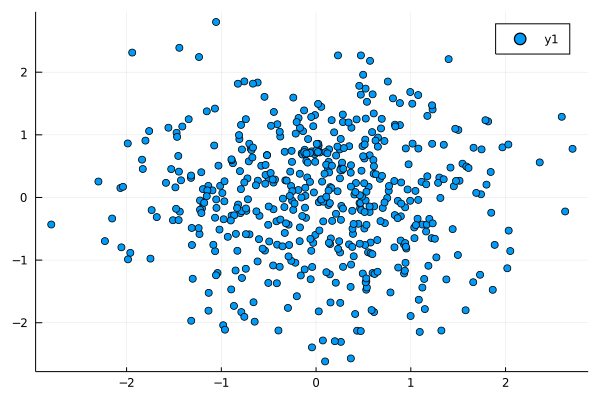

In [5]:
plot(X[:,1], X[:,2], seriestype = :scatter)

In [7]:
depth=depth_unsuccessful_search(256)
F0  = iForest(X,256,200,depth,0)() # ExtensionLevel=0 is the same as regular Isolation Forest
F1  = iForest(X,256,200,depth,1)()

iForest([-1.0537567652795559 -0.031487583850894584; 0.6534268024904982 0.9555911204869227; … ; 0.42788359345299337 1.2461401384517692; 0.4969320652623215 1.9591199301966031], 500, 256, 200, 8, 1, 10.244770920116851, iTree[iTree([0.34948503102273715 0.817901868787969; -0.9615379906264224 -2.1108814392113873; … ; -0.9680241927906766 -0.06134286269515236; -0.7405684553090754 -0.5858715633914093], 3, 8, 1, 256, 2, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10  …  247, 248, 249, 250, 251, 252, 253, 254, 255, 256], 65, [0.9645322688329877, -0.13431122295566877], [2.2781825211566558 1.0167833065512908], Node([0.34948503102273715 0.817901868787969; -0.9615379906264224 -2.1108814392113873; … ; -0.9680241927906766 -0.06134286269515236; -0.7405684553090754 -0.5858715633914093], [0.8854743508230882, 0.6462206413506616], [1.0986843380243827 2.131816840314719], 0.0, 256, "inNode", Node([0.34948503102273715 0.817901868787969; -0.9615379906264224 -2.1108814392113873; … ; -0.9680241927906766 -0.06134286269515236; -0.

In [9]:
xxx = zeros(1,2)
@time  SL0 = compute_paths_single_tree(F0,xxx, 1)

  0.224697 seconds (761.91 k allocations: 37.855 MiB)


1-element Array{Float64,1}:
 11.296251627910626

In [10]:
SL0[1]

11.296251627910626

In [11]:
F1.limit

8

# Score

In [12]:
# Score the training data itself to see the distribution of the anomaly scores each point receives. 
S0 = compute_paths(F0)
S1 = compute_paths(F1)

500-element Array{Float64,1}:
 0.42940282101147054
 0.432686509989078
 0.40494278192918187
 0.4433592605869258
 0.4232580349469149
 0.4123998668337686
 0.5048689335264632
 0.4027616557307686
 0.44574572913103633
 0.4182127571183866
 0.4443820173497457
 0.4736642156845564
 0.43327085343258104
 ⋮
 0.40251014380764594
 0.47864868484434836
 0.40810041128985086
 0.5907349334925251
 0.4195803375318153
 0.42046718216144324
 0.43383870285960663
 0.40898779433312266
 0.46187659997594616
 0.4890823693141335
 0.4465838130048317
 0.5458873936774022

In [13]:
ss0=sortperm(S0)
ss1=sortperm(S1)

500-element Array{Int64,1}:
 278
 468
 383
 113
 265
 277
 405
 242
 482
 171
 121
 194
 366
   ⋮
 167
 472
  63
 399
 312
 385
 411
  39
 244
  17
 142
  41

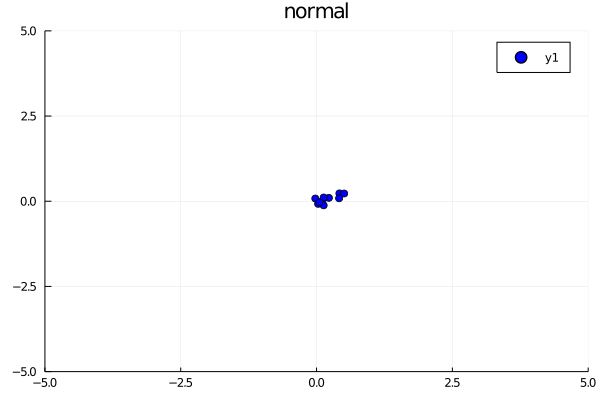

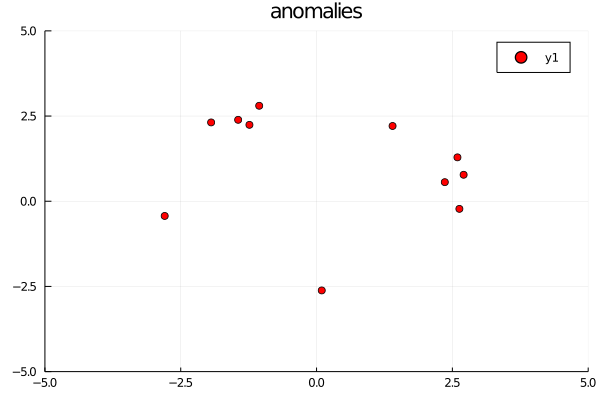

In [14]:
#Extension 0
Plots.default(overwrite_figure=false)
p1 =plot(X[ss0[1:10],1], X[ss0[1:10],2], seriestype = :scatter,xlim=(-5,5), ylim=(-5, 5),color = :blue,title="normal")
l=length(ss0)
p2=plot(X[ss0[l-10:l],1], X[ss0[l-10:l],2], seriestype = :scatter,xlim=(-5,5), ylim=(-5, 5),color = :red,title ="anomalies")

display(p1)
display(p2)

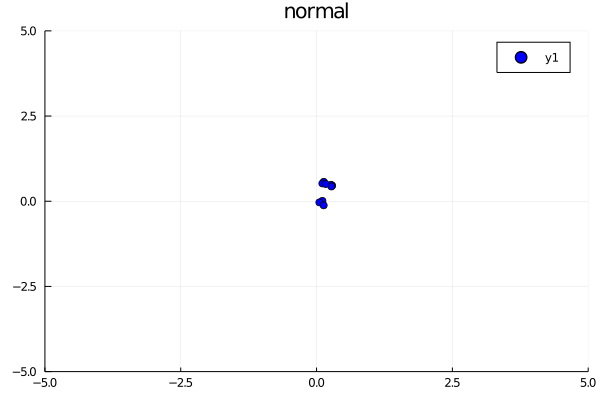

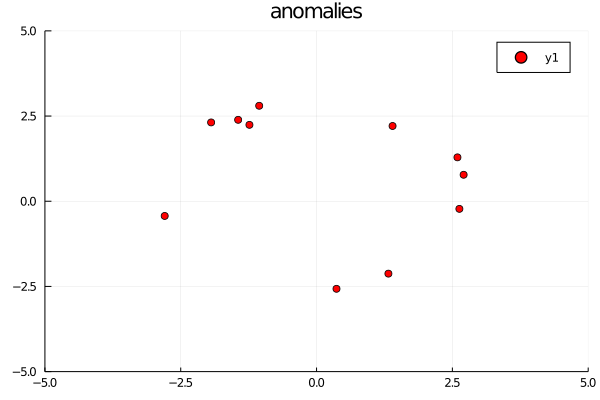

In [15]:
#Extension 1
Plots.default(overwrite_figure=false)
p1 =plot(X[ss1[1:10],1], X[ss1[1:10],2], seriestype = :scatter,xlim=(-5,5), ylim=(-5, 5),color = :blue,title="normal")
l=length(ss1)
p2=plot(X[ss1[l-10:l],1], X[ss1[l-10:l],2], seriestype = :scatter,xlim=(-5,5), ylim=(-5, 5),color = :red,title ="anomalies")

display(p1)
display(p2)

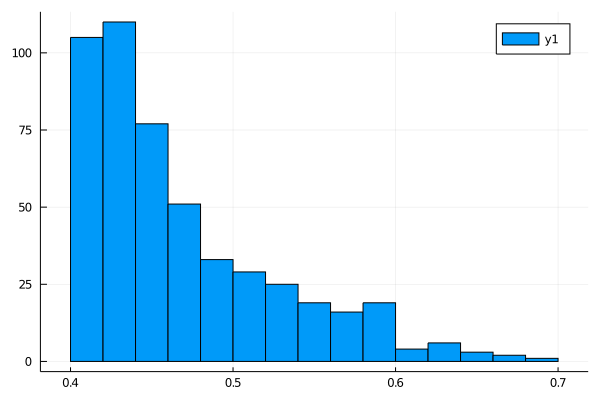

In [16]:
plot(S0, seriestype=:hist)

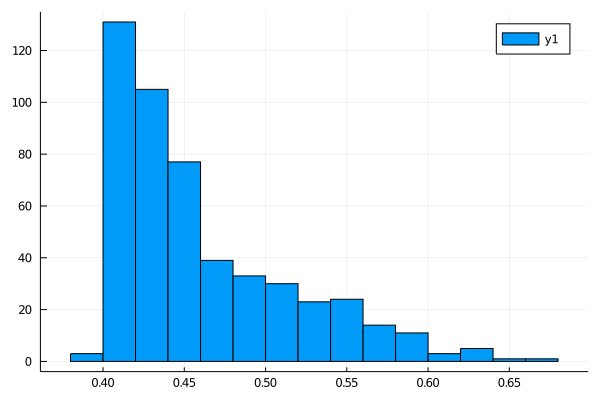

In [17]:
plot(S1, seriestype=:hist)

In [48]:
normal_point= zeros(1,2)
anomaly = reshape([3.3,3.3],:,2)

1×2 Array{Float64,2}:
 3.3  3.3

In [84]:
rn, thetan = getVals(F1,normal_point,true)
mean(rn)

5.629826149268903

In [85]:
ra, thetaa = getVals(F1,anomaly,true)
mean(ra)

6.688973215883356

# Multiple Blobs

In [65]:
dist1=MvNormal([10,0], Diagonal(ones(2)))
Nobjs = 250
X1=rand(dist1,Nobjs)
X1=collect(transpose(X1))

250×2 Array{Float64,2}:
  9.01494   1.77103
 11.0626   -0.626594
 11.2595    0.525954
 10.7721   -0.876339
  8.49407   2.48291
 10.105     0.257903
 10.6686   -0.0197428
 12.3811    1.51765
 10.0098    0.45966
  9.91047  -0.544901
  9.86636  -0.877198
  9.51829   0.353532
  9.90929  -1.71165
  ⋮        
 10.5748    0.636049
 10.4077    0.589412
  9.69101   0.228235
  9.72161  -0.874655
 10.2364    0.5513
 10.5458   -0.895708
 10.0486    0.54715
 11.026    -1.26699
  9.08172  -0.0186409
  8.62411   0.712422
  9.22303  -0.570711
 10.4922   -0.012127

In [66]:
dist2=MvNormal([0,10], Diagonal(ones(2)))
Nobjs = 250
X2=rand(dist2,Nobjs)
X2=collect(transpose(X2))

250×2 Array{Float64,2}:
 -0.93745      10.8036
  0.884214      9.59019
  0.457704      8.57462
  2.41401       9.42468
  0.753709     10.1297
 -0.723732      8.31872
 -1.56914      10.2856
 -0.463664     10.4812
 -1.7998        9.09905
 -1.02693       8.73198
 -1.85805      10.456
  1.05821       9.68
 -0.000385181  11.3336
  ⋮            
  2.04351       9.24296
 -0.830904      9.98631
 -0.411555     11.2526
  1.1144       10.7571
  0.470683      9.0352
 -0.323066     10.7898
 -0.413491      8.68538
  0.220316      9.32594
  0.148876      8.22799
 -0.105475      9.1139
  0.0289856     9.35673
  2.8419       10.049

In [71]:
X=vcat(X1,X2)

500×2 Array{Float64,2}:
  9.01494     1.77103
 11.0626     -0.626594
 11.2595      0.525954
 10.7721     -0.876339
  8.49407     2.48291
 10.105       0.257903
 10.6686     -0.0197428
 12.3811      1.51765
 10.0098      0.45966
  9.91047    -0.544901
  9.86636    -0.877198
  9.51829     0.353532
  9.90929    -1.71165
  ⋮          
  2.04351     9.24296
 -0.830904    9.98631
 -0.411555   11.2526
  1.1144     10.7571
  0.470683    9.0352
 -0.323066   10.7898
 -0.413491    8.68538
  0.220316    9.32594
  0.148876    8.22799
 -0.105475    9.1139
  0.0289856   9.35673
  2.8419     10.049

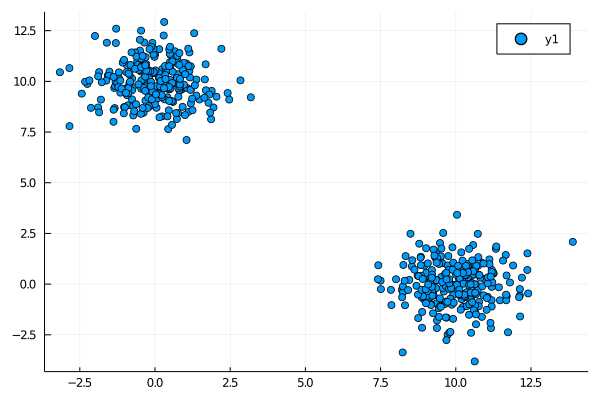

In [73]:
plot(X[:,1], X[:,2], seriestype = :scatter)

In [74]:
depth=depth_unsuccessful_search(256)
F0  = iForest(X,256,200,depth,0)() # ExtensionLevel=0 is the same as regular Isolation Forest
F1  = iForest(X,256,200,depth,1)()

iForest([9.014942019114773 1.771033889228668; 11.062648440843311 -0.6265937527971741; … ; 0.02898562455351022 9.356734652741645; 2.84190430503362 10.0490045073956], 500, 256, 200, 8, 1, 10.244770920116851, iTree[iTree([8.6914266342677 -0.08212276263816984; -0.22700975976855778 10.50831165092306; … ; 10.22216617305323 1.1605155728357206; 8.7647609800676 0.39178786967463886], 1, 8, 1, 256, 2, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10  …  247, 248, 249, 250, 251, 252, 253, 254, 255, 256], 69, [-0.9200235389935665, -0.9596408626195189], [1.7275218874027907 9.12658548639156], Node([8.6914266342677 -0.08212276263816984; -0.22700975976855778 10.50831165092306; … ; 10.22216617305323 1.1605155728357206; 8.7647609800676 0.39178786967463886], [0.6906564283214776, 0.9653066627637078], [10.980838920285255 7.9756073136988075], 0.0, 256, "inNode", Node([8.6914266342677 -0.08212276263816984; -0.22700975976855778 10.50831165092306; … ; 10.22216617305323 1.1605155728357206; 8.7647609800676 0.39178786967463886], [0

# Score

In [75]:
# Score the training data itself to see the distribution of the anomaly scores each point receives. 
S0 = compute_paths(F0)
S1 = compute_paths(F1)

500-element Array{Float64,1}:
 0.4971025958360139
 0.4484055623843378
 0.46163094943761895
 0.44588228043565253
 0.5770493225558947
 0.4089069142392558
 0.4191718755432293
 0.5734487833254984
 0.40962428510988075
 0.42301336701177755
 0.43164529254572453
 0.41784799713941434
 0.4846579403139689
 ⋮
 0.5255771919853146
 0.4385015336927913
 0.4564370573914413
 0.47907481172505356
 0.44026539976587964
 0.42519150643168424
 0.4621220920064348
 0.42674067525501713
 0.49251316274849183
 0.43463252013373554
 0.4269987803204119
 0.5811922162916711

In [76]:
ss0=sortperm(S0)
ss1=sortperm(S1)

500-element Array{Int64,1}:
 237
 194
 198
 176
  71
   6
  95
  91
   9
  56
 110
 241
 192
   ⋮
 410
 463
 231
 382
 473
 366
 278
 413
 120
 313
 181
  62

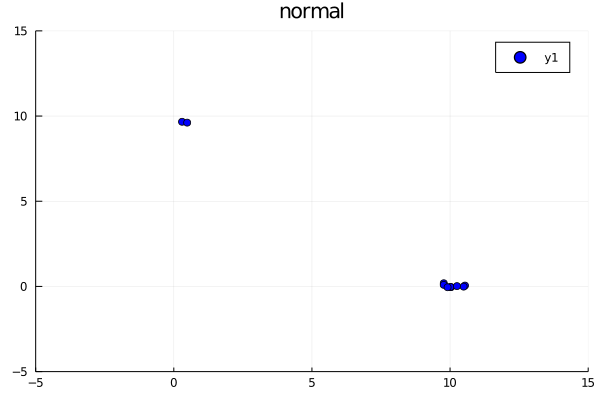

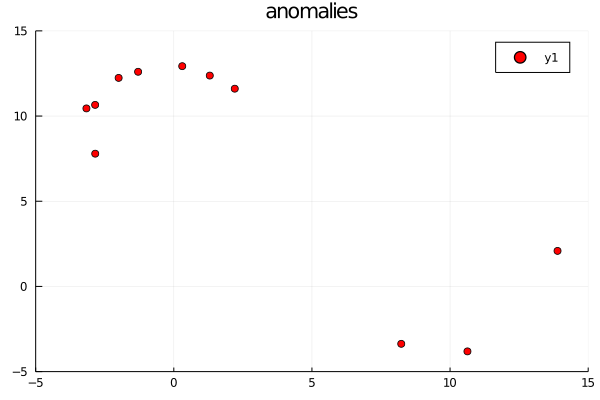

In [78]:
#Extension 0
Plots.default(overwrite_figure=false)
p1 =plot(X[ss0[1:10],1], X[ss0[1:10],2], seriestype = :scatter,xlim=(-5,15), ylim=(-5, 15),color = :blue,title="normal")
l=length(ss0)
p2=plot(X[ss0[l-10:l],1], X[ss0[l-10:l],2], seriestype = :scatter,xlim=(-5,15), ylim=(-5, 15),color = :red,title ="anomalies")

display(p1)
display(p2)

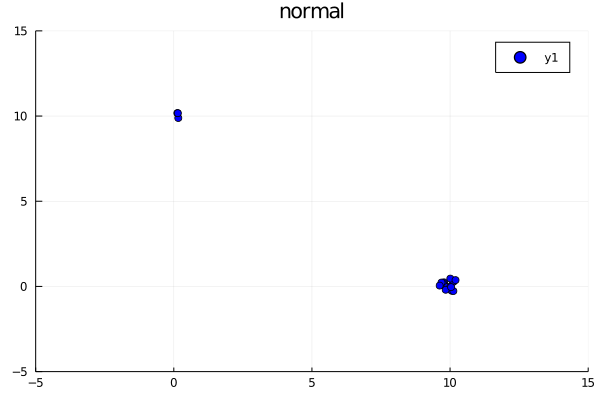

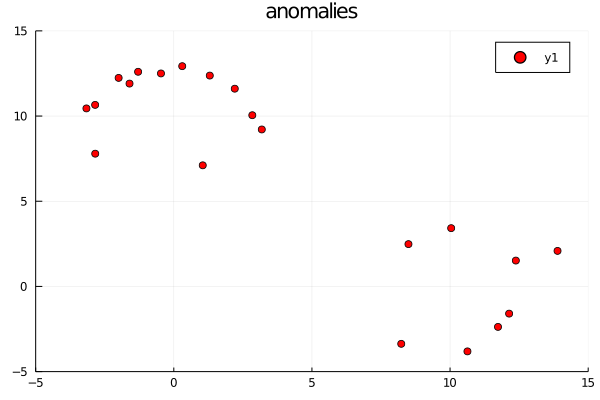

In [81]:
#Extension 1
Plots.default(overwrite_figure=false)
p1 =plot(X[ss1[1:20],1], X[ss1[1:20],2], seriestype = :scatter,xlim=(-5,15), ylim=(-5, 15),color = :blue,title="normal")
l=length(ss1)
p2=plot(X[ss1[l-20:l],1], X[ss1[l-20:l],2], seriestype = :scatter,xlim=(-5,15), ylim=(-5, 15),color = :red,title ="anomalies")

display(p1)
display(p2)

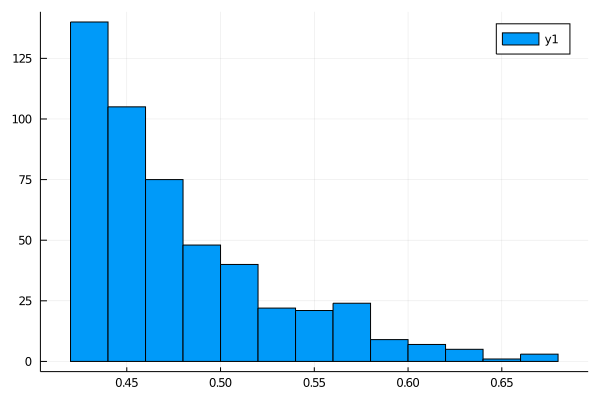

In [82]:
plot(S0, seriestype=:hist)

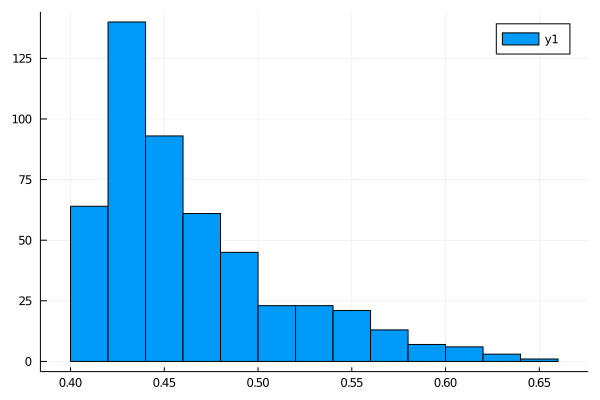

In [83]:
plot(S1, seriestype=:hist)

In [86]:
normal_point=reshape([10,0],:,2) 
anomaly = zeros(1,2)

1×2 Array{Float64,2}:
 0.0  0.0

In [89]:
rn, thetan = getVals(F1,normal_point,true)
mean(rn)

12.719075832605409

In [90]:
ra, thetaa = getVals(F1,anomaly,true)
mean(ra)

7.383627057514108

# Sinusoidal Data

In [101]:
N = 1000
x = rand(N)*8*pi
y = sin.(x) + rand(N)/4.
X=hcat(x,y)

1000×2 Array{Float64,2}:
  2.77954   0.552574
 15.2061    0.670343
  2.40834   0.818981
 15.4741    0.44735
 24.6339   -0.349079
 16.3965   -0.582274
 21.0211    1.01752
  6.18287   0.132923
 23.7949   -0.882287
 21.7871    0.447977
  1.15999   1.13015
 23.1024   -0.865042
 23.4219   -0.956378
  ⋮        
 19.9952    1.15987
 14.3044    1.01599
  8.19156   1.09585
  5.73963  -0.365701
 21.4523    0.595183
  6.84471   0.706957
  3.53692  -0.178226
 21.3765    0.738366
 21.1809    0.807143
 16.5331   -0.538119
 21.3532    0.782171
 20.8402    0.950274

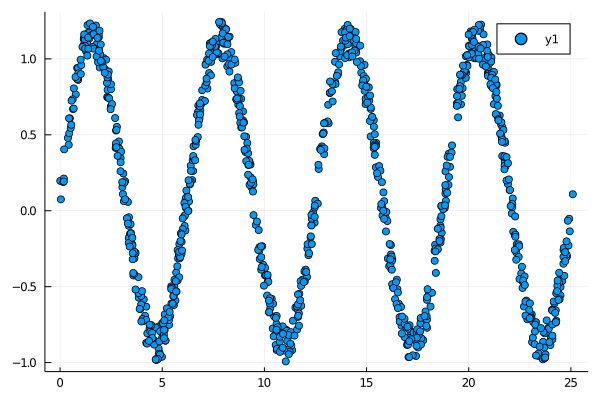

In [102]:
plot(X[:,1], X[:,2], seriestype = :scatter)

In [121]:
depth=depth_unsuccessful_search(256)
F0  = iForest(X,256,500,depth,0)() # ExtensionLevel=0 is the same as regular Isolation Forest
F1  = iForest(X,256,500,depth,1)()

iForest([2.779540169349715 0.5525744273087028; 15.206124854104713 0.6703425467913708; … ; 21.353184323124953 0.7821711249356182; 20.840231885836516 0.9502738384559866], 1000, 256, 500, 8, 1, 10.244770920116851, iTree[iTree([7.987972210609345 1.1065479419706215; 21.42552991701296 0.6910808400567422; … ; 20.785174851321504 0.9918637534220274; 10.223258337405769 -0.5915770476009057], 8, 8, 1, 256, 2, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10  …  247, 248, 249, 250, 251, 252, 253, 254, 255, 256], 69, [0.6641393855393547, -0.6250168139931271], [21.05602451765915 0.9240410650549747], Node([7.987972210609345 1.1065479419706215; 21.42552991701296 0.6910808400567422; … ; 20.785174851321504 0.9918637534220274; 10.223258337405769 -0.5915770476009057], [-1.9636333542549107, 0.019399401990594884], [24.718188386142135 -0.7394277890554141], 0.0, 256, "inNode", Node([24.807663871311235 -0.301480280413109], [-1.9636333542549107, 0.019399401990594884], [24.718188386142135 -0.7394277890554141], 1.0, 1, "exNode", #u

# Score

In [122]:
# Score the training data itself to see the distribution of the anomaly scores each point receives. 
S0 = compute_paths(F0)
S1 = compute_paths(F1)

1000-element Array{Float64,1}:
 0.5180417814812863
 0.48335786723625135
 0.5136113784785964
 0.47910982853497386
 0.5597825714599338
 0.4861449317230941
 0.4966273613248518
 0.47951409714032883
 0.5349709249440097
 0.5060777151947163
 0.5289112038235046
 0.5353532187028047
 0.5416768142358345
 ⋮
 0.5073969003227582
 0.48430204597339854
 0.48795198963051556
 0.47738407784766446
 0.49820136152399924
 0.48529365895577997
 0.506522786911683
 0.49679612108645055
 0.490158452075004
 0.48184236489046567
 0.4961239861415903
 0.48734513572090954

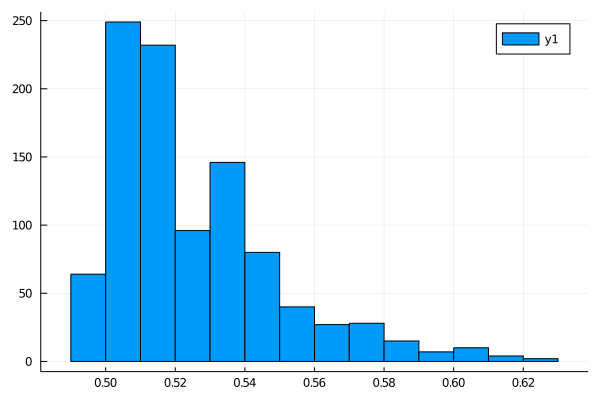

In [136]:
plot(S0, seriestype=:hist)

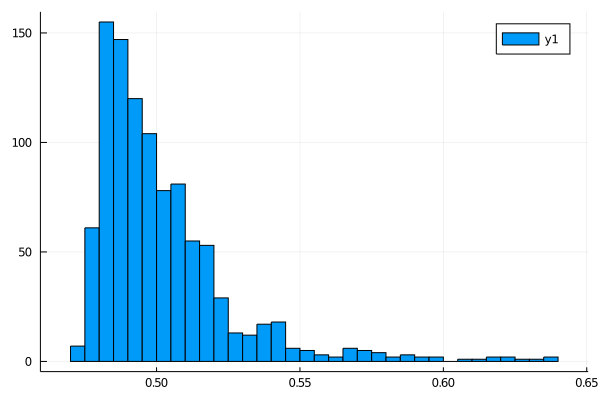

In [137]:
plot(S1, seriestype=:hist)

In [124]:
ss0=sortperm(S0)
ss1=sortperm(S1)

1000-element Array{Int64,1}:
 453
 258
 183
 199
 338
 696
 518
 161
 212
 690
 473
 377
 942
   ⋮
 553
 126
  79
 369
 211
 912
 747
 799
 413
 857
 585
 267

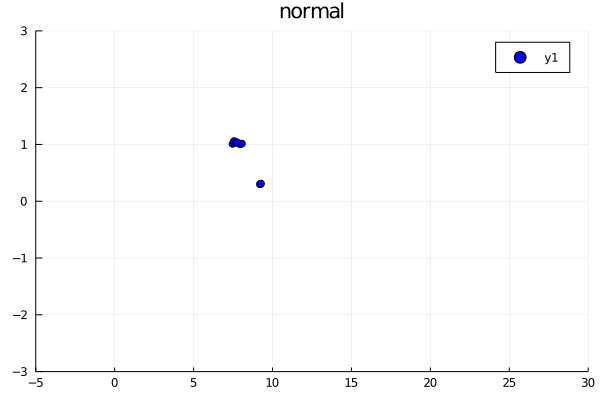

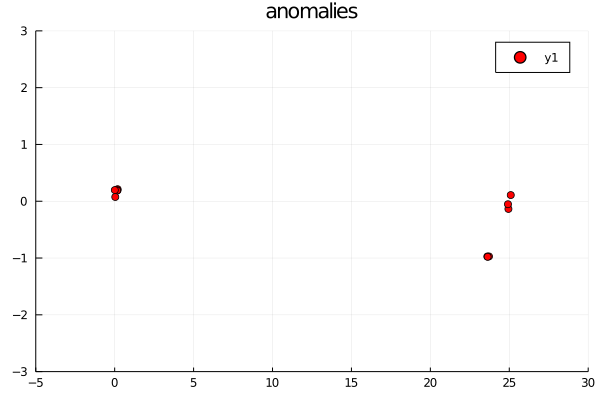

In [126]:
#Extension 0
Plots.default(overwrite_figure=false)
p1 =plot(X[ss0[1:10],1], X[ss0[1:10],2], seriestype = :scatter,xlim=(-5,30), ylim=(-3, 3),color = :blue,title="normal")
l=length(ss0)
p2=plot(X[ss0[l-10:l],1], X[ss0[l-10:l],2], seriestype = :scatter,xlim=(-5,30), ylim=(-3, 3),color = :red,title ="anomalies")

display(p1)
display(p2)

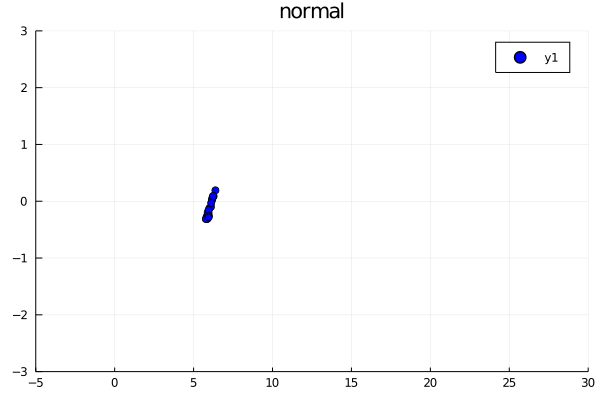

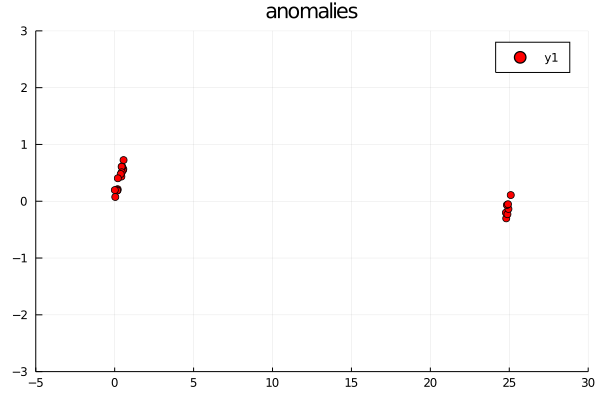

In [127]:
#Extension 1
Plots.default(overwrite_figure=false)
p1 =plot(X[ss1[1:20],1], X[ss1[1:20],2], seriestype = :scatter,xlim=(-5,30), ylim=(-3, 3),color = :blue,title="normal")
l=length(ss1)
p2=plot(X[ss1[l-20:l],1], X[ss1[l-20:l],2], seriestype = :scatter,xlim=(-5,30), ylim=(-3, 3),color = :red,title ="anomalies")

display(p1)
display(p2)